<a href="https://colab.research.google.com/github/sisiyotakele/gdsc_study_session_ML_g1/blob/main/Copy_of_breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upload dataset to Colab**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving breast_cancer_bd.csv to breast_cancer_bd.csv


# **Import required libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Load the dataset**

In [3]:
df = pd.read_csv("breast_cancer_bd.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# **Understand the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# **Drop non-informative column**

In [5]:
df = df.drop('Sample code number', axis=1)

# **Handle missing values**

In [6]:
df = df.replace('?', np.nan)
df = df.dropna()


# **Separate features(X) and target (y)**

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

# **Visualize class distribution**

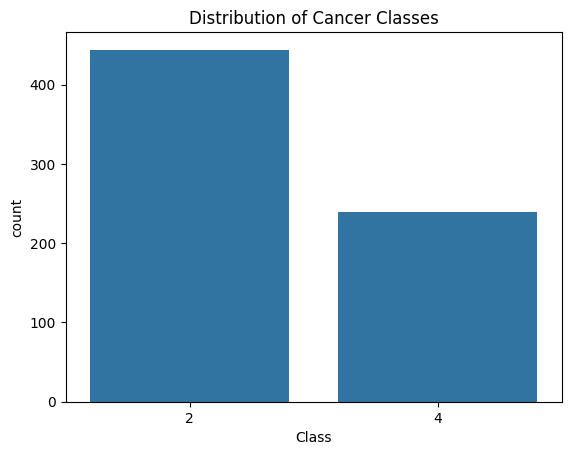

In [8]:
sns.countplot(x='Class', data=df)
plt.title("Distribution of Cancer Classes")
plt.show()

# **Train-Test split(70/30)**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ***Train Logistic Regression model***

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# **Make predictions**

In [11]:
y_pred = model.predict(X_test)

# **Evaluate the model**

## ***Accuracy***

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Accuracy in percent: {accuracy * 100:.2f}%")

Accuracy: 0.9560975609756097
Accuracy in percent: 95.61%


## ***Confusion Matrix***

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[125   2]
 [  7  71]]


## **Classification Report**

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

